In [1]:
import os
from pathlib import Path
import pandas as pd
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/stefanocoretta/infant-gestures/master/"
# the url of where I download the dataset from

VOCAB_PATH = os.path.join("datasets", "infant-gestures")
# the path for the specific housing dataset; I could join "datasets", "name_of_another_dataset"

VOCAB_URL = DOWNLOAD_ROOT + "data/vocab.csv"
# the url for the specific housing data adds the root url to the path for the dataset that I want


In [2]:
def fetchload_vocab_data(vocab_url = VOCAB_URL, vocab_path = VOCAB_PATH):
    if not os.path.isdir(vocab_path):
        os.makedirs(vocab_path)
        # this creates a directory, "datasets/housing" in the workspace
    vocab_path = os.path.join(vocab_path, "vocab.csv")
    # this joins the housing path "datasets/housing" with "housing.tgz"; "datasets/housing/housing.tgz"
    urllib.request.urlretrieve(vocab_url, vocab_path)
    # retrieve from the github, the dataset, and save that to the tgz_path on my computer
    return pd.read_csv(vocab_url)

In [3]:
vocab = fetchload_vocab_data()
vocab.head()

vocab.dropna(subset=["comprehension"], inplace=True)
print(vocab)

    dyad  comprehension  production  months background
0    b01          157.0         6.0      12    Bengali
1    b02          115.0         6.0      12    Bengali
2    b03           77.0         1.0      12    Bengali
3    b04          252.0        38.0      12    Bengali
4    b05          120.0         9.0      12    Bengali
..   ...            ...         ...     ...        ...
114  e15          281.0        22.0      18    English
115  e16          250.0       172.0      18    English
116  e17          353.0       277.0      18    English
117  e18          337.0        43.0      18    English
119  e20           76.0         9.0      18    English

[117 rows x 5 columns]


Each row represents one dyad. There are 5 attributes: 
1. dyad number
2. comprehension
3. production
4. months
5. background

In [17]:
# vocab.info()

In [18]:
# vocab["comprehension"].value_counts()

In [19]:
# vocab.describe()

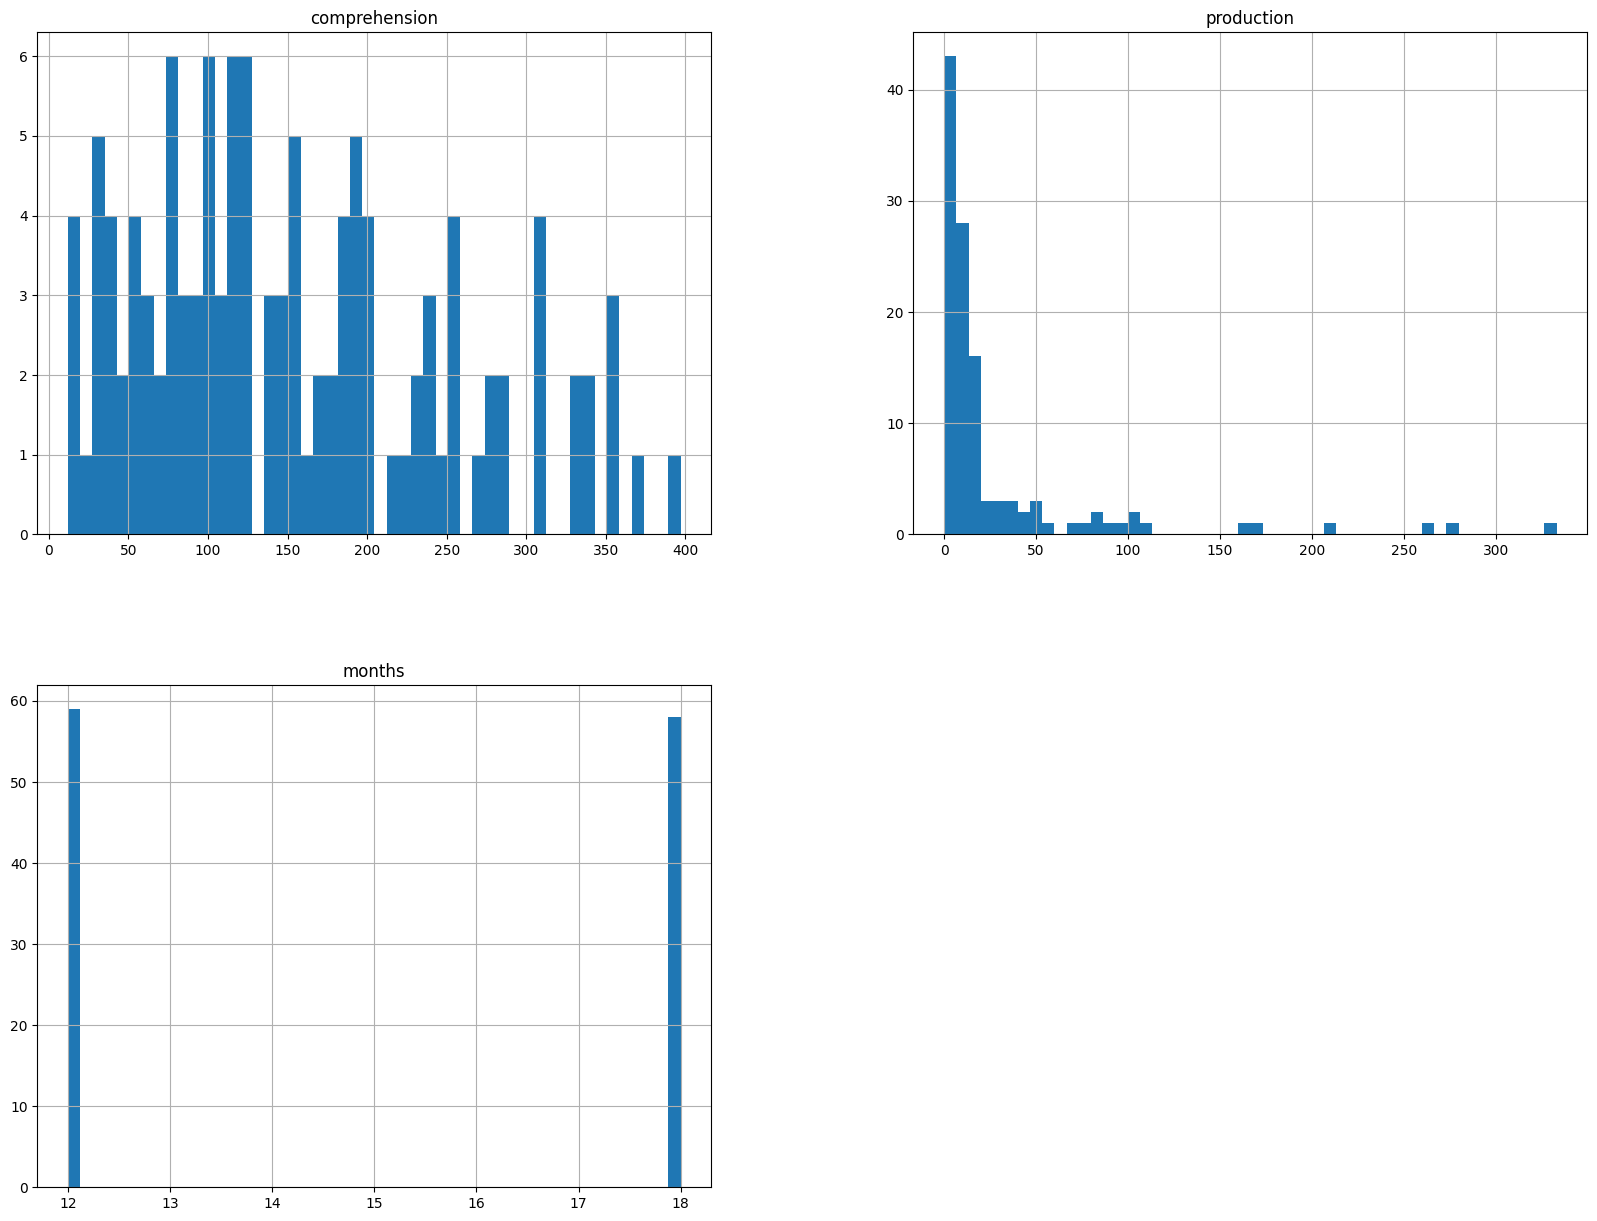

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
vocab.hist(bins = 50, figsize=(20, 15))
plt.show()

In [5]:
import numpy as np
from zlib import crc32

In [ ]:
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda, id: test_set_check(id, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [7]:
vocab_with_id = vocab.reset_index()
vocab_with_id["id"] = vocab["dyad"] * 1000
vocab_with_id.head()

,index,dyad,comprehension,production,months,background,id
0,0,b01,157.0,6.0,12,Bengali,b01b01b01b01b01b01b01b01b01b01b01b01b01b01b01b...
1,1,b02,115.0,6.0,12,Bengali,b02b02b02b02b02b02b02b02b02b02b02b02b02b02b02b...
2,2,b03,77.0,1.0,12,Bengali,b03b03b03b03b03b03b03b03b03b03b03b03b03b03b03b...
3,3,b04,252.0,38.0,12,Bengali,b04b04b04b04b04b04b04b04b04b04b04b04b04b04b04b...
4,4,b05,120.0,9.0,12,Bengali,b05b05b05b05b05b05b05b05b05b05b05b05b05b05b05b...


In [13]:
vocab["comprehension_cat"] = pd.cut(vocab["comprehension"], 
                                    bins = [0., 50, 100, 150, 200, 250, 300, 350, 400],
                                    labels = [1, 2, 3, 4, 5, 6, 7, 8])

vocab["comprehension_cat"].value_counts()

comprehension_cat
3    26
2    22
4    22
1    16
5     9
6     9
7     8
8     5
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(vocab, vocab["comprehension_cat"]):
    strat_train_set = vocab.loc[train_index]
    strat_test_set = vocab.loc[test_index]

KeyError: '[112, 58] not in index'

In [ ]:

strat_test_set["comprehension_cat"]